# **Task - 02:**  Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

# **Project Overview:**
**Customer Segmentation with K-means Clustering**

- Employed advanced data analysis techniques to extract valuable insights from customer data in a retail store.
- Employed the robust unsupervised machine learning algorithm, K-means clustering, to investigate patterns in customer behavior.c- Scrutinized critical attributes such as 'Age,' 'Annual Income,' and 'Spending Score' for the identification of distinct customer segments.
- Carefully employed the Elbow Method to pinpoint the optimal number of clusters, ensuring accurate and precise segmentation.
- Generated impactful visualizations, including a dynamic 3D graph, to effectively portray comprehensive patterns within the customer data.
- Utilized the silhouette score as a quantitative measure to assess the quality and effectiveness of clustering.
- Illustrated the efficacy of data-driven decision-making, empowering businesses to strategize, personalize, and optimize customer experiences with unprecedented precision.istory.

In [1]:
# importing libraries that are using for the project
import numpy as  np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly as px

In [3]:
# load the data set
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# look at the dataset shape
df.shape

(200, 5)

In [6]:
# describing our data
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
# checking the types of data that present in our dataset
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [9]:
# checking the null values in the dataset
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Observation:
1. In this data set only Gender column hold categorical values in form of obj. Otherwise all columns holding numerical values or datatype.

2. There is no any null values present in the dataset.

In [11]:
# droping the unnecessary column from the data
df.drop(["CustomerID"], axis = 1, inplace= True)

In [12]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


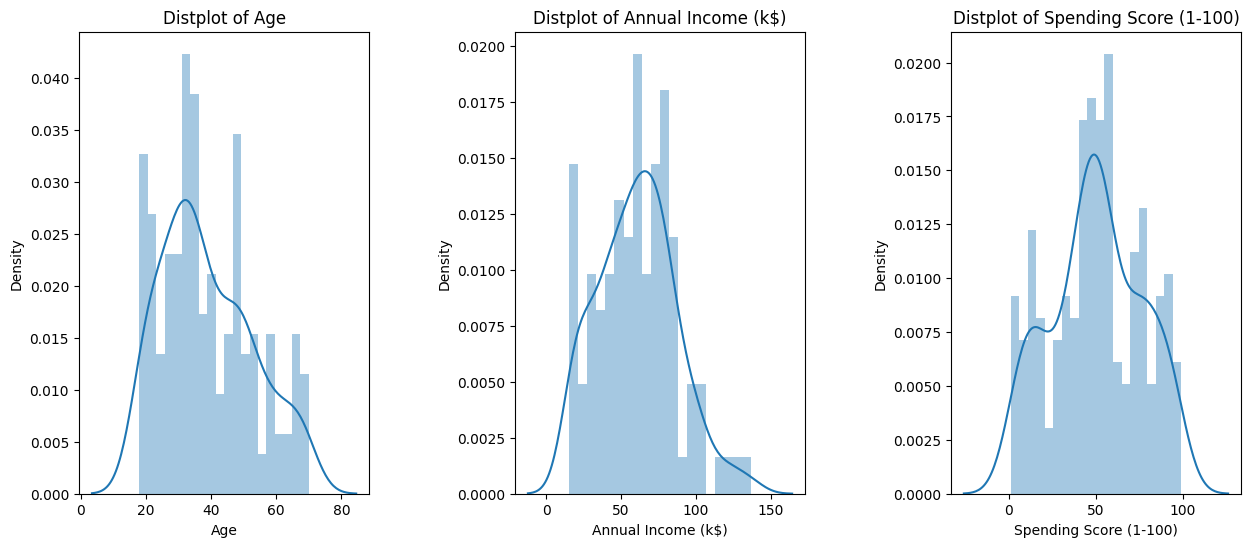

In [22]:
# creating a distplot for Age, Annual Income, Spending score. for comparing the data

import warnings
warnings.filterwarnings("ignore")

plt.figure(1, figsize= (15,6))
n = 0 
for i in ['Age', 'Annual Income (k$)','Spending Score (1-100)']:
    n +=  1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(df[i], bins = 20)
    plt.title('Distplot of {}'.format(i))
plt.show()

# Observations:
1. In Displot of age we can see that age group between 30-40 getting highest density.Means this age category purchase in a high quantity. 

2. In case of Annual Income most people's Income lays between 50 to 70k dollor in our dataset.

3. In case of Spending score we can see that around 50 spending score get higher density.

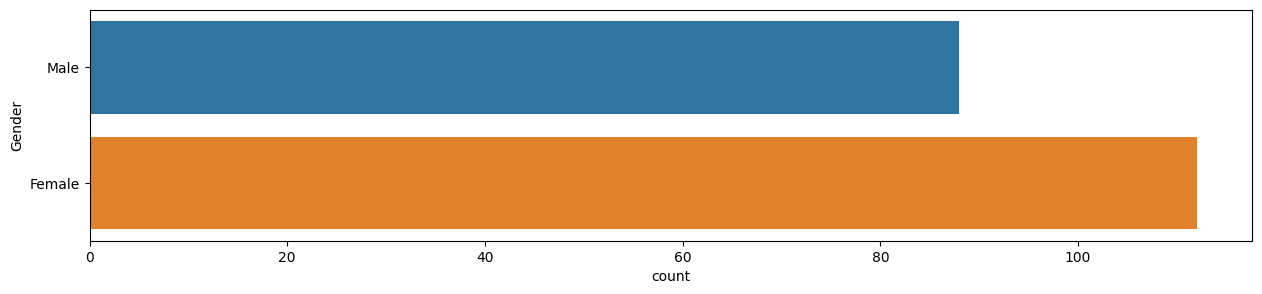

In [30]:
# lets check with male and female category for better understanding 
plt.figure(figsize= (15,3))
sns.countplot(data = df, y = 'Gender')
plt.show()

# Observation : 
With this plot is clearly visible that Woman ratio is high when compare to men. and we know that women purchasing power is more when compare to men. 

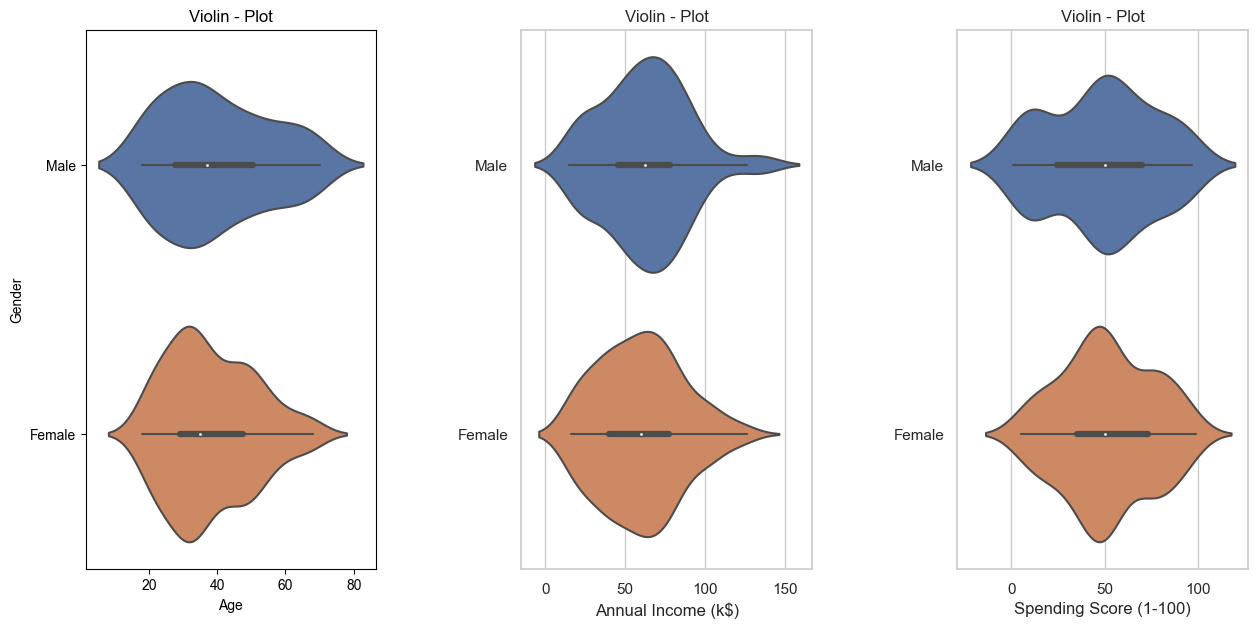

In [31]:
#let's compare gender to Age, Annual income and spending score by the help of violin plot
plt.figure(figsize=(15,7))
n= 0 
for cols in ['Age', 'Annual Income (k$)','Spending Score (1-100)']:
    n += 1
    plt.subplot(1,3,n)
    sns.set(style = 'whitegrid')
    plt.subplots_adjust(hspace= 0.5, wspace= 0.5)

    sns.violinplot(data = df, x = cols, y = 'Gender')
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Violin - Plot')
plt.show()

# Observations:
1.  In case of Age category we can see that the women who has 30-40 age group holds higer density that shows they purshase more.

2. Only in case of Annual income 50-60 age group men get high density in all our data.

3. In case of Spending score women get highest density at around 50 of of 100.

In [36]:
# for better understanding which age group having highest costomer lets devide the age into different ranges
age_18_25 = df.Age[(df.Age >= 18 )& (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26 )& (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36 )& (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46 )& (df.Age <= 55)]
age_above = df.Age[df.Age >= 56]

age_x = ['18-25', '26-35', '36-45', '46-55', '55+']
age_y = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values), len(age_above.values)]

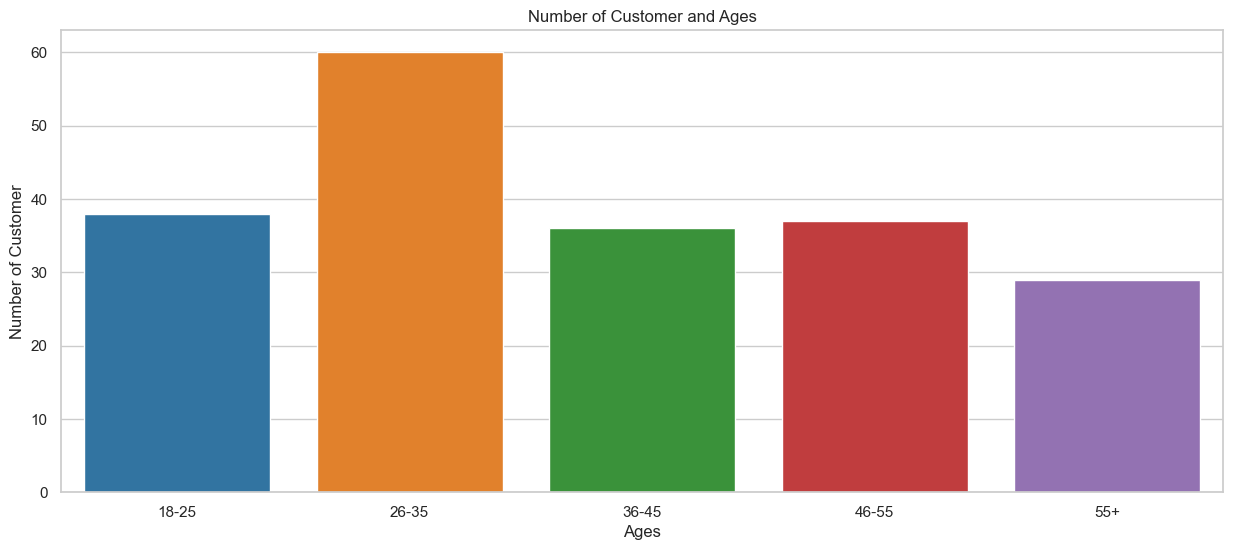

In [40]:
# let's visualize these ranges through Bar plot 
plt.figure(figsize=(15,6))
sns.barplot(x = age_x, y = age_y, palette= 'tab10')
plt.title('Number of Customer and Ages')
plt.xlabel('Ages')
plt.ylabel('Number of Customer')
plt.show()

# Observation:
With this bar plot it clearly visible that highest number of counts lays between Age of 26-35. 

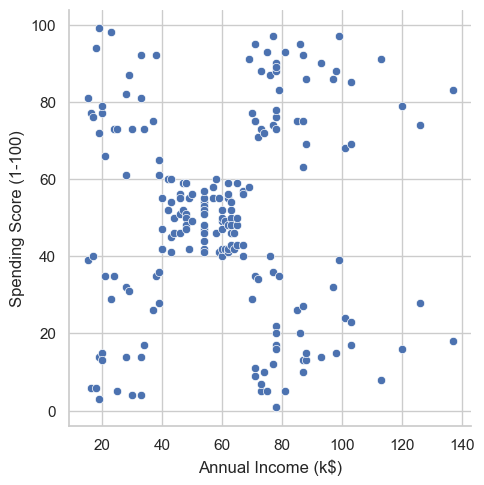

In [43]:
# try to understand the relationship between Annual income and spending score.
sns.relplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)')

# Observation:
there is no much relationship when it comes to annual income that lays between 20-40 or even 80-140. but there is some relation with costomers who have annual income between 40k-60k having a tipical spending score in between 40-60 out of 100

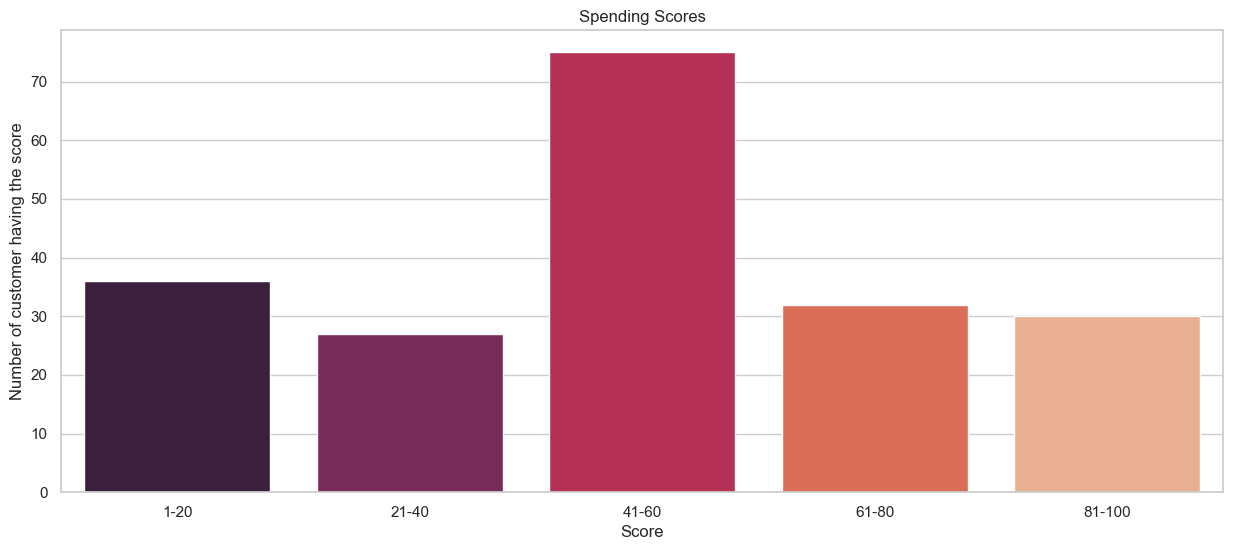

In [55]:
# deviding spending score in different categories
ss_1_20 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 1) & (df['Spending Score (1-100)'] <= 20)]
ss_21_40 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 21) & (df['Spending Score (1-100)'] <= 40)]
ss_41_60 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 41) & (df['Spending Score (1-100)'] <= 60)]
ss_61_80 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 61) & (df['Spending Score (1-100)'] <= 80)]
ss_81_100 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 81) & (df['Spending Score (1-100)'] <= 100)]

ss_x = ['1-20', '21-40', '41-60', '61-80', '81-100']
ss_y = [len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values), len(ss_81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(data = df, x = ss_x, y = ss_y, palette= 'rocket')
plt.title('Spending Scores')
plt.xlabel('Score')
plt.ylabel('Number of customer having the score')
plt.show()

In [57]:
# deviding the annual income in different ranges for better understanding 
ai_0_30 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 0) & (df['Annual Income (k$)'] <= 30)]
ai_31_60 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 31) & (df['Annual Income (k$)'] <= 60)]
ai_61_90 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 61) & (df['Annual Income (k$)'] <= 90)]
ai_91_120 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 91) & (df['Annual Income (k$)'] <= 120)]
ai_121_150 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 121) & (df['Annual Income (k$)'] <= 150)]

ai_x = ['$0-30,000', '31,000-60,000', '61,000-90,000', '91,000-1,20,000', '1,21,000=1,50,000']
ai_y = [len(ai_0_30.values), len(ai_31_60.values), len(ai_61_90.values), len(ai_91_120.values), len(ai_121_150.values)]

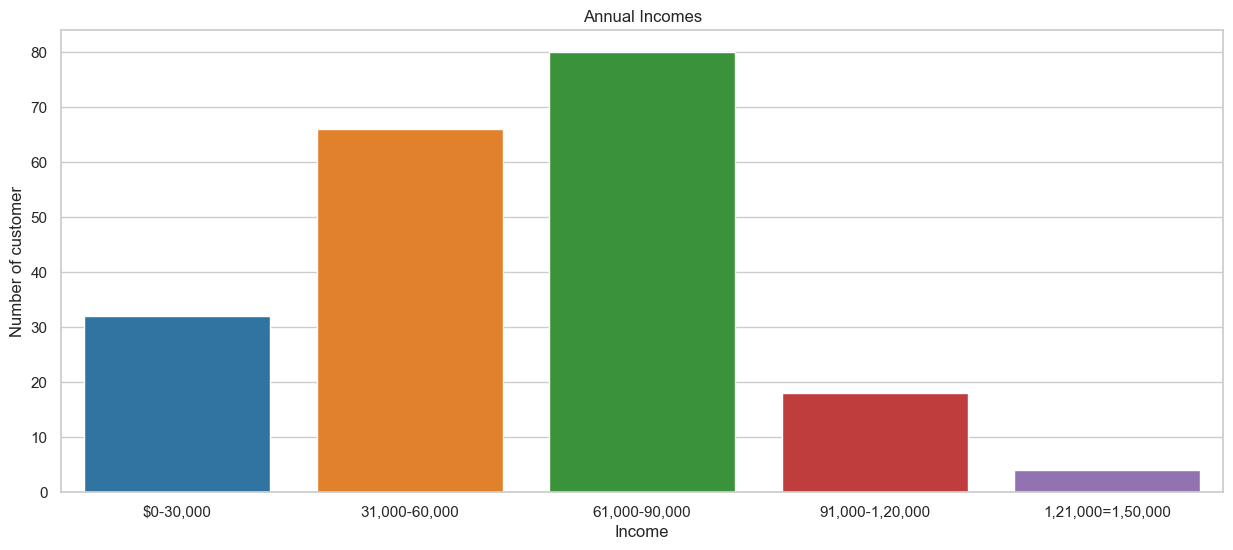

In [60]:
# Ploting the bar plot for annual income
plt.figure(figsize=(15,6))
sns.barplot(data = df, x = ai_x, y = ai_y, palette= 'tab10')
plt.title('Annual Incomes')
plt.xlabel('Income')
plt.ylabel('Number of customer')
plt.show()

# Observation:
1. Maximum number of our customer having spending score between 41 to 60.

2. Most of the our customer having annual income lays between 61,000 to 90,000$ 

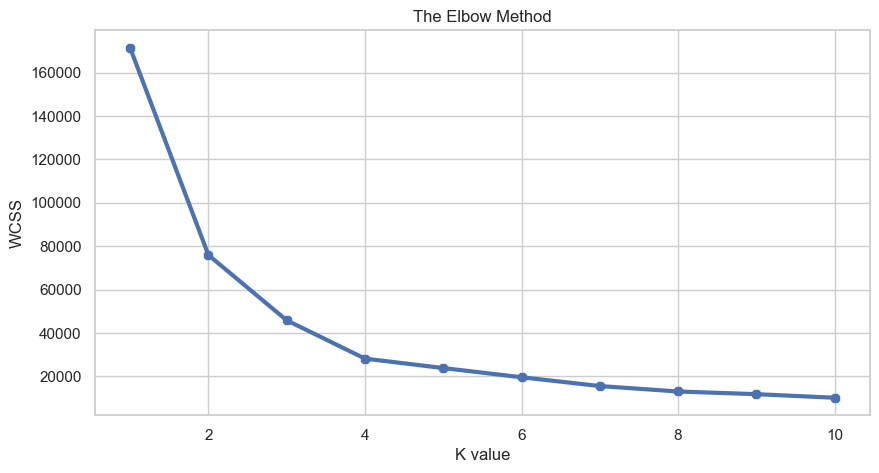

In [80]:
x1 = df.loc[:, ['Age', 'Spending Score (1-100)']].values

#importing the kmeans form sklearn libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init= 'k-means++')
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)   ## inertia gives the distance between the centroids and other points

#ploting the elbow 
plt.figure(figsize=(10,5))
plt.plot(range(1,11),wcss, linewidth = 3, color = 'b', marker = '8')
plt.title('The Elbow Method')
plt.xlabel('K value')
plt.ylabel('WCSS')
plt.show()

In [81]:
#Initialize the class object 
kmeans = KMeans(n_clusters= 4)

#predict the label of clusters
label = kmeans.fit_predict(x1)
label

array([2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 2, 0, 1, 2, 1,
       0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 3, 2,
       0, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 2, 1, 3, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [82]:
# checking the centroid 
print(kmeans.cluster_centers_)

[[43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [27.61702128 49.14893617]
 [55.70833333 48.22916667]]


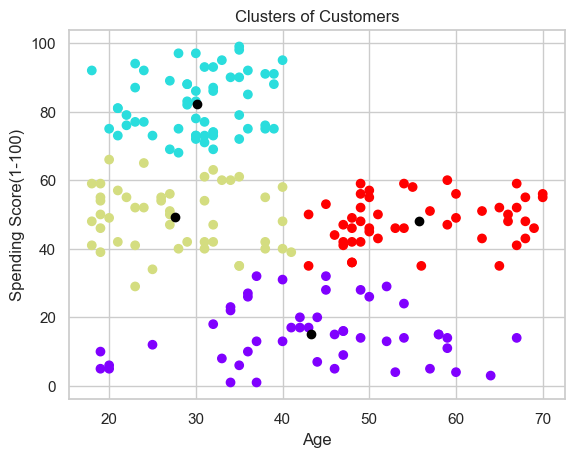

In [88]:
# plot the scatter plot for the centroid visualization 
plt.scatter(x1[:,0], x1[:,1], c = kmeans.labels_, cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'black')

plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100)')
plt.show()

# Observation :
here the all data devided into 4 clusters and the black points represent the centroids of the cluster

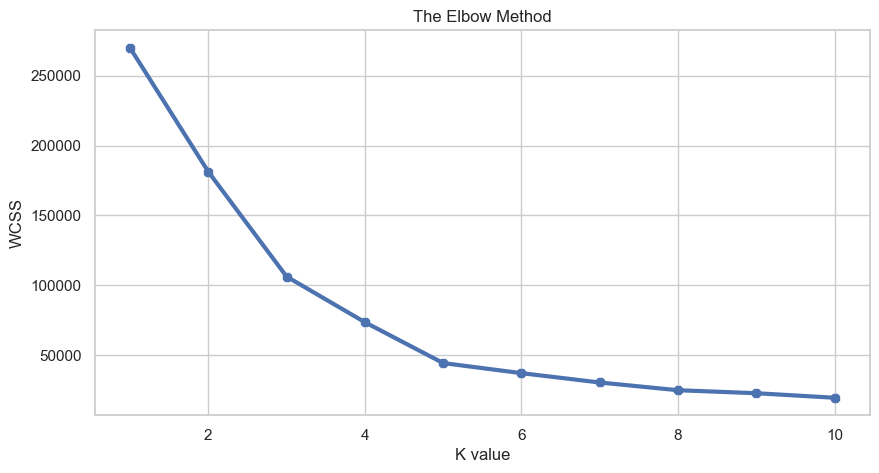

In [90]:
# let's make cluster with annual income and spending score
x2 = df.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']].values

#importing the kmeans form sklearn libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init= 'k-means++')
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)   ## inertia gives the distance between the centroids and other points

#ploting the elbow 
plt.figure(figsize=(10,5))
plt.plot(range(1,11),wcss, linewidth = 3, color = 'b', marker = '8')
plt.title('The Elbow Method')
plt.xlabel('K value')
plt.ylabel('WCSS')
plt.show()

# Observation :
we can see that there is a sharp bend at somewhere around 5 and after that the graph is very constent.So let's consider that optimum number of cluster that we need to create in this case  are 5.

In [91]:
#Initialize the class object 
kmeans = KMeans(n_clusters= 5)

#predict the label of clusters
label = kmeans.fit_predict(x2)
label

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1,
       2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 4, 0, 1, 0, 4, 0, 4, 0,
       1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0])

In [92]:
# centroid of the cluster for annual and spending score 
print(kmeans.cluster_centers_)

[[86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [88.2        17.11428571]]


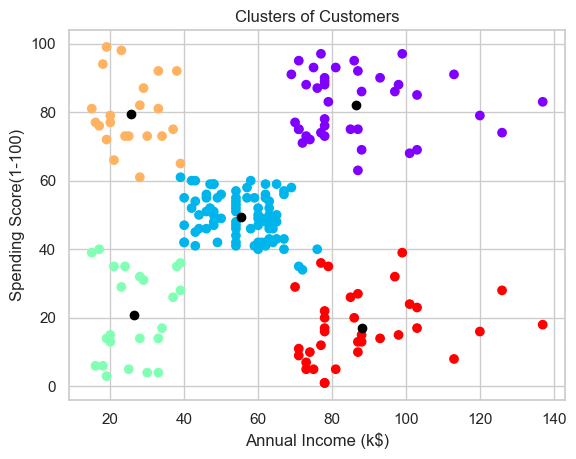

In [93]:
# representing our cluster using scatter plot  
plt.scatter(x2[:,0], x2[:,1], c = kmeans.labels_, cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'black')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

# Observation :
we can see the representation here the data had been devided into 5 clusters and the black points are the cluster's centroid

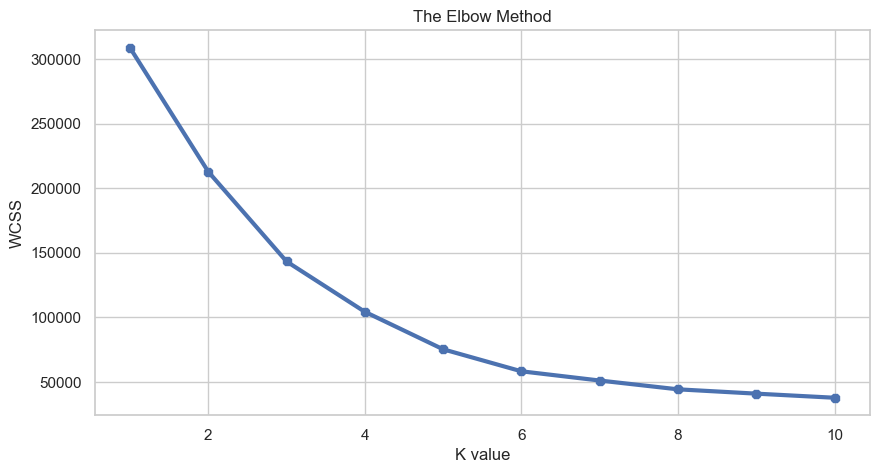

In [96]:
# now lets combine all three 3 features age, annual income and spending score
x3 = df.iloc[:,1:]   # including all 3 features together

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init= 'k-means++')
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)   ## inertia gives the distance between the centroids and other points

#ploting the elbow 
plt.figure(figsize=(10,5))
plt.plot(range(1,11),wcss, linewidth = 3, color = 'b', marker = '8')
plt.title('The Elbow Method')
plt.xlabel('K value')
plt.ylabel('WCSS')
plt.show()

# Observation:
By this graph we can see that after 5 the graph seen pretty constent, so let's consider that optimum number of cluster for this clustering is going to be 5

In [98]:
#Initialize the class object 
kmeans = KMeans(n_clusters= 5)

#predict the label of clusters
label = kmeans.fit_predict(x3)
label

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [99]:
# checking for the centroid 
print(kmeans.cluster_centers_)

[[43.08860759 55.29113924 49.56962025]
 [45.2173913  26.30434783 20.91304348]
 [40.66666667 87.75       17.58333333]
 [32.69230769 86.53846154 82.12820513]
 [25.52173913 26.30434783 78.56521739]]


In [117]:
# making a 3rd plot using plotly for the final grah
x3 = df.iloc[:,1:]

kmeans = KMeans(n_clusters=5)
labels = kmeans.fit_predict(x3)
centers = kmeans.cluster_centers_

# Create a DataFrame with the data and labels
df1 = pd.DataFrame(x3, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
df1['Cluster'] = labels.astype(str)

# Create a DataFrame with cluster centers (use the same column names as in df1)
centers_df = pd.DataFrame(centers, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
centers_df['Cluster'] = 'Center'

# Concatenate data and centers DataFrames
final_df = pd.concat([df1, centers_df], ignore_index=True)

# Plot the 3D scatter plot using Plotly
fig = px.scatter_3d(final_df, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color='Cluster',
                    symbol='Cluster', size_max=8, opacity=0.9,
                    title='K-means Clustering in 3D',color_discrete_map={'Center': 'black'})
fig.show()

# Final Observation:
This is our 3d representation of clusters based on our 3 variable ['Age', 'Annual Income', 'Spending Score']. 
so in this way our customer segmentation done where we clustering our data in various variable using k means clustring algorithm